## Question_2

In [1]:
import re
import nltk

import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from bs4 import BeautifulSoup

In [2]:
import os
os.chdir(r"C:\Users\최보경\Desktop\2019SN\GrowthHackers\Education\Session Slides\5th_EDU\Session_11\nlp_data")
review_df=pd.read_csv("hotel-reviews.csv",usecols=['Description'])
review_df.head()

,Description
0,The room was kind of clean but had a VERY stro...
1,I stayed at the Crown Plaza April -- - April -...
2,I booked this hotel through Hotwire at the low...
3,Stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...


In [3]:
review_list=review_df['Description'].tolist()

### 1_cutting into sentences

In [4]:
sentences=[]
for i in range(0,len(review_list)):
    sentences.append(list(review_list[i].split()))

In [5]:
for i in range(len(sentences)):
    if ':' in sentences[i]:
        sentences[i].remove(':')
    if ',' in sentences[i]:
        sentences[i].remove(',')
    if '.' in sentences[i]:
        sentences[i].remove('.')
    if '!' in sentences[i]:
        sentences[i].remove('!') 
    if '-' in sentences[i]:
        sentences[i].remove('-')
    if '_' in sentences[i]:
        sentences[i].remove('_') 
    if '--' in sentences[i]:
        sentences[i].remove('--')
    if '---' in sentences[i]:
        sentences[i].remove('---')
    if '----' in sentences[i]:
        sentences[i].remove('----')
    if "-'" in sentences[i]:
        sentences[i].remove("-'")

In [6]:
sentences[0]

['The',
 'room',
 'was',
 'kind',
 'of',
 'clean',
 'but',
 'had',
 'a',
 'VERY',
 'strong',
 'smell',
 'of',
 'dogs.',
 'Generally',
 'below',
 'average',
 'but',
 'ok',
 'for',
 'a',
 'overnight',
 'stay',
 'if',
 "you're",
 'not',
 'too',
 'fussy.',
 'Would',
 'consider',
 'staying',
 'again',
 'if',
 'the',
 'price',
 'was',
 'right.',
 'Breakfast',
 'was',
 'free',
 'and',
 'just',
 'about',
 'better',
 'than',
 'nothing.']

### 2_Word2Vec

In [7]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(sentences,size=100, window=3,workers=4, min_count=5, sg=1)

model.init_sims(replace=True)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [8]:
len(model.wv.vocab)

28989

In [9]:
model.wv.most_similar('kind')

[('sort', 0.6702731251716614),
 ('uncaring', 0.6072226762771606),
 ('funny', 0.599238395690918),
 ('Kind', 0.5944602489471436),
 ('utterly', 0.5904266238212585),
 ('indicative', 0.5871763825416565),
 ('genuinely', 0.5855967998504639),
 ('uninterested', 0.5846734046936035),
 ('energetic', 0.5833344459533691),
 ('horribly', 0.5827122330665588)]

### 3_t-sne를 활용한 Word2Vec의 시각화

In [10]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

mpl.rcParams['axes.unicode_minus'] = False

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:326: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


28989
[ 0.19989622  0.12488259 -0.00109439  0.18060334  0.00459727 -0.14904456
  0.07470553  0.08413147  0.01948121  0.01787149]


In [11]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

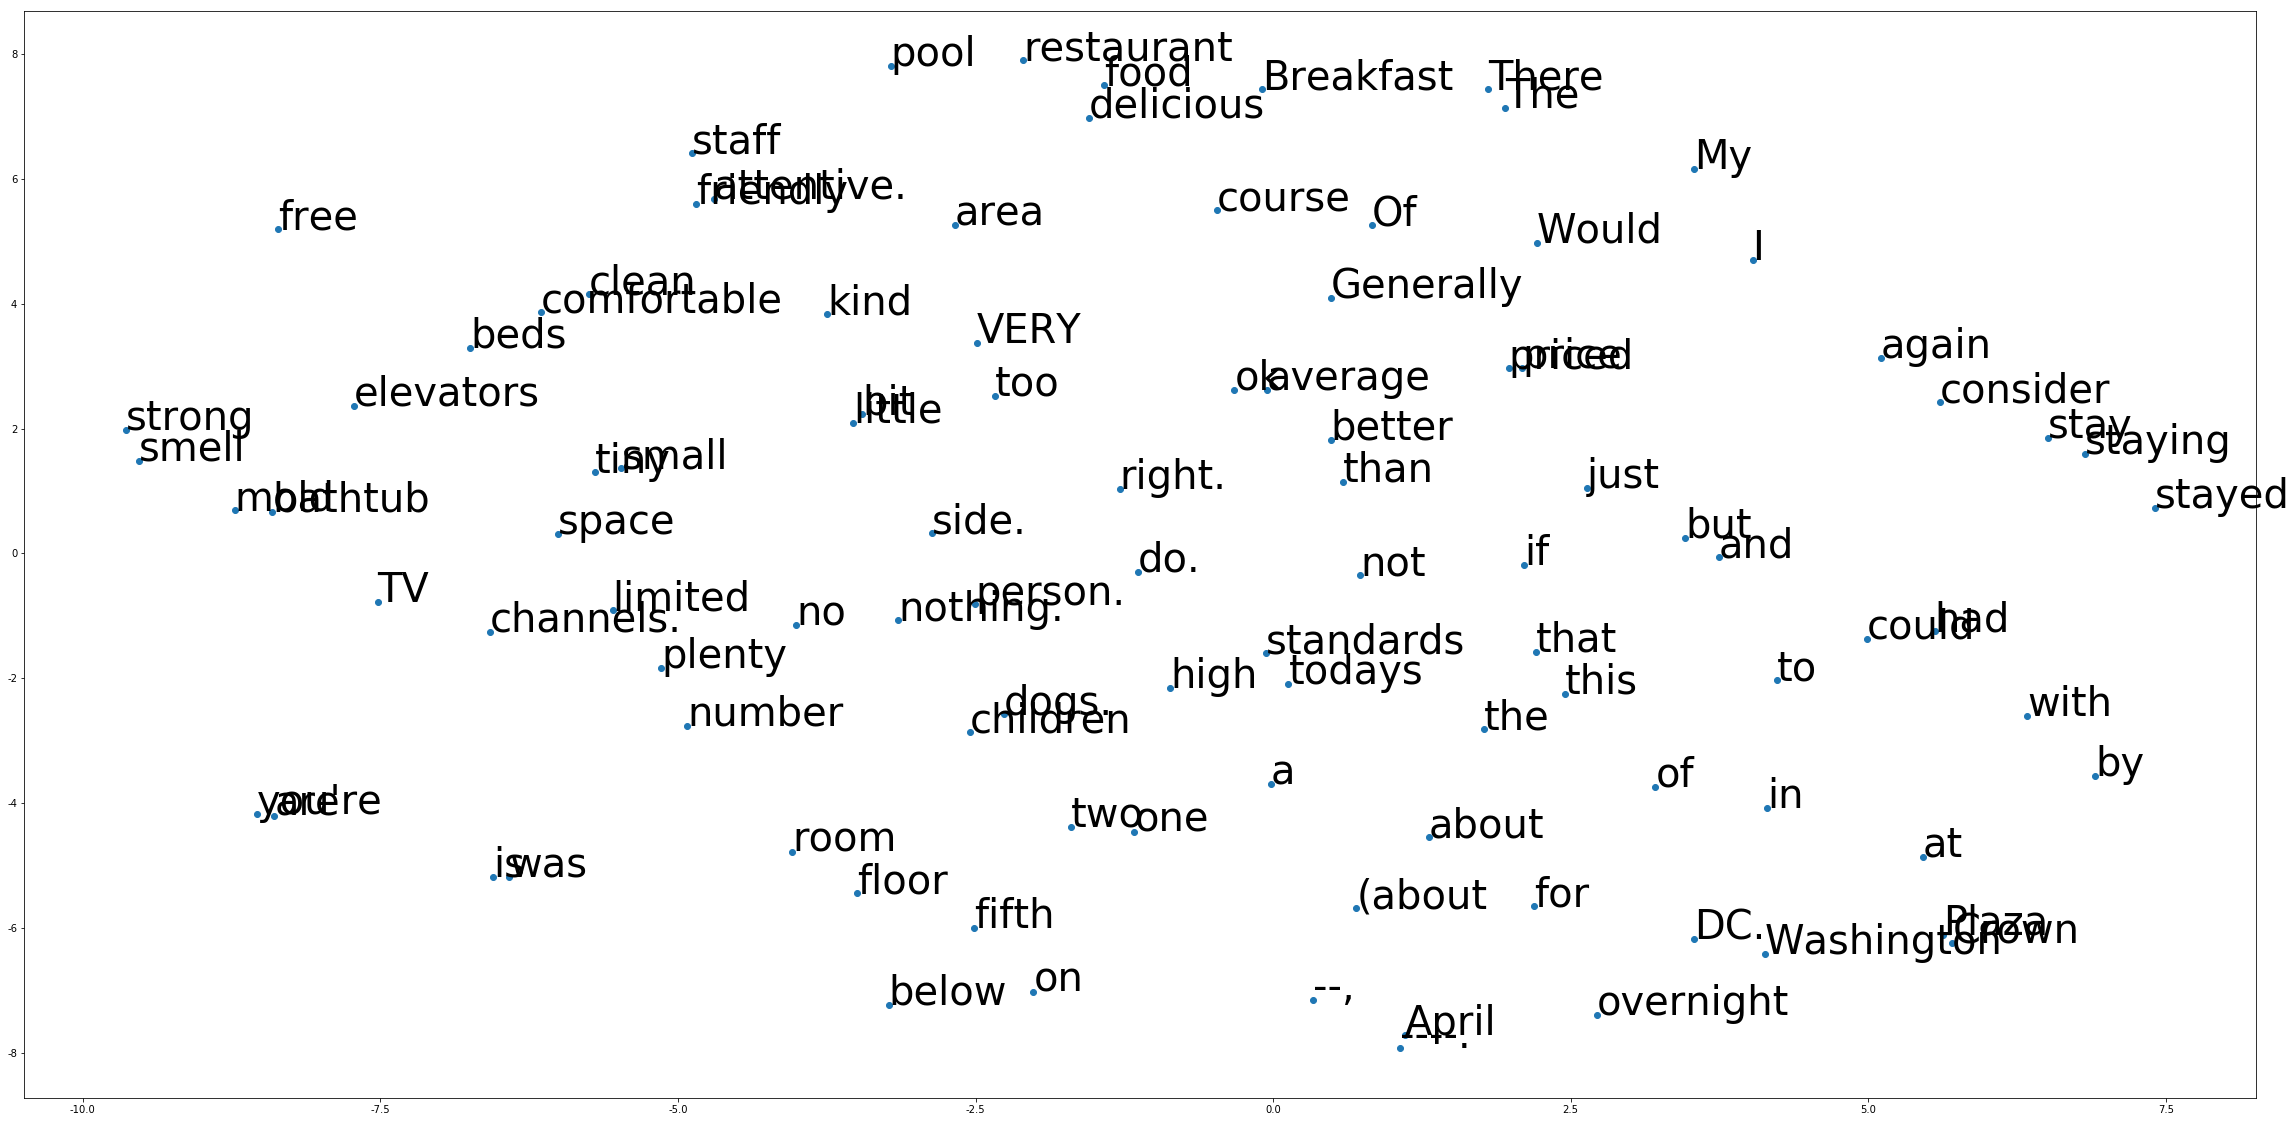

In [12]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=40)
plt.show()